In [1]:
import pandas as pd
import numpy as np

In [2]:
whisky = pd.read_csv("whiskies.txt")

In [3]:
whisky["Region"] = pd.read_csv("regions.txt")

In [4]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [5]:
flavors = whisky.iloc[:, 2:14]

In [11]:
corr_flavors = pd.DataFrame.corr(flavors)
corr_whisky = pd.DataFrame.corr(flavors.transpose())

In [7]:
import matplotlib.pyplot as plt

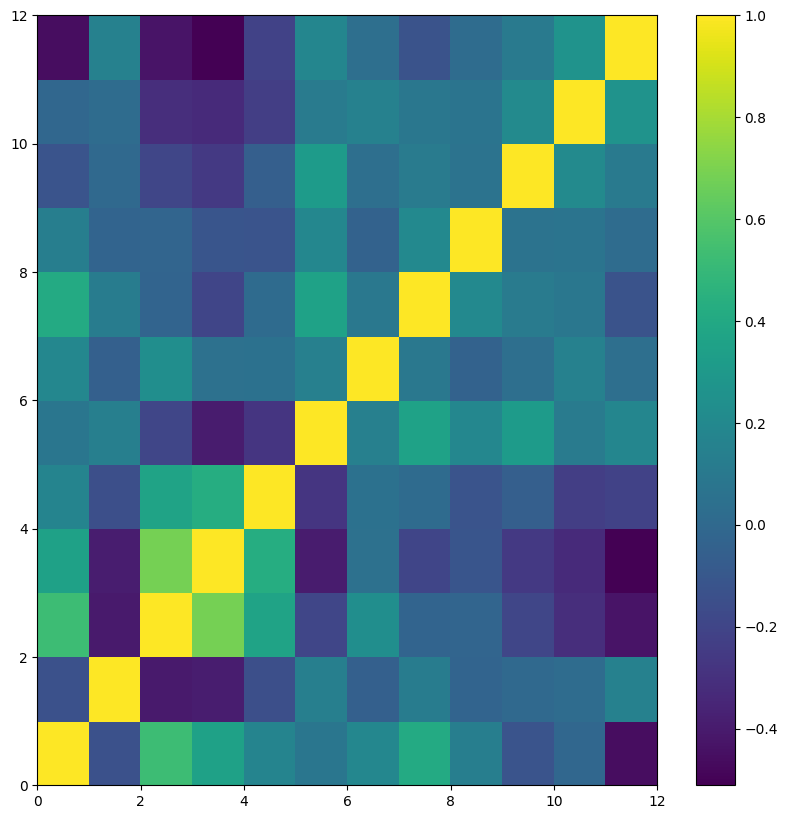

In [8]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()

In [10]:
from sklearn.cluster._bicluster import SpectralCoclustering

In [12]:
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)

SpectralCoclustering(n_clusters=6, random_state=0)

In [14]:
np.sum(model.rows_, axis=1)

array([20,  5, 19, 17,  6, 19])

In [15]:
whisky["Group"] = pd.Series(model.row_labels_, index=whisky.index)

In [18]:
whisky = whisky.iloc[np.argsort(model.row_labels_)]

In [19]:
whisky = whisky.reset_index(drop=True)

In [20]:
correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())
correlations = np.array(correlations)

(0.0, 86.0, 0.0, 86.0)

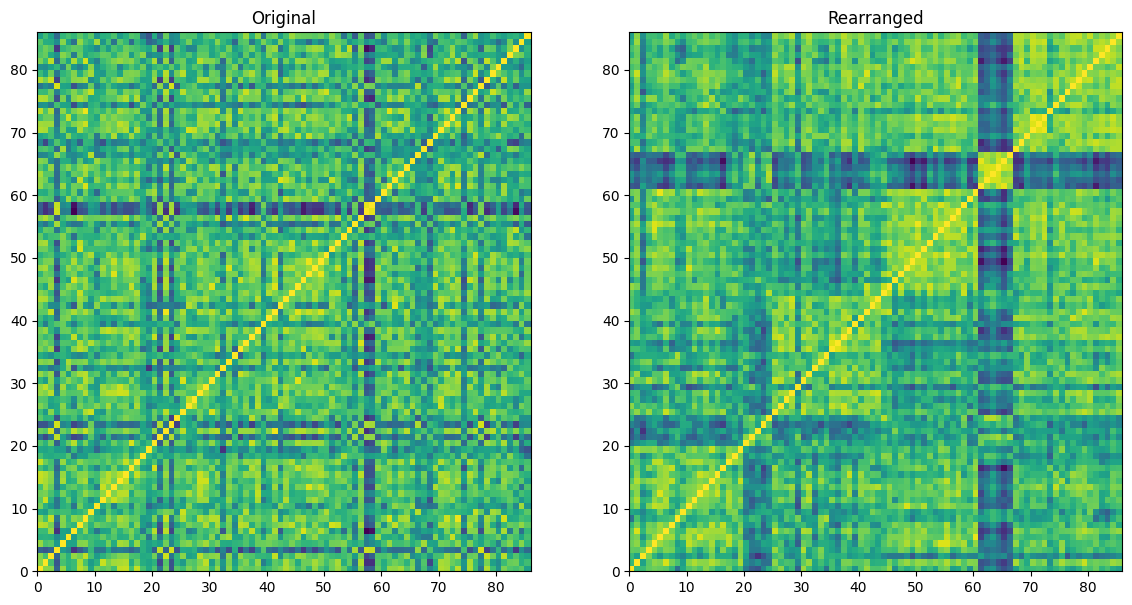

In [26]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")